In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("Onion_Price_16-21.xlsx")

In [3]:
df = df.loc[::-1]

In [4]:

df_r = df.reset_index()
df_r.head()

,index,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival
0,1693,Maharashtra,Pune,Pune,Local,Vegetables,1775,500,2000,1700,2016-01-01
1,1692,Maharashtra,Pune,Pune,Local,Vegetables,1848,700,1800,1600,2016-01-03
2,1691,Maharashtra,Pune,Pune,Local,Vegetables,1327,500,1800,1500,2016-01-04
3,1690,Maharashtra,Pune,Pune,Local,Vegetables,1392,600,1800,1600,2016-01-05
4,1689,Maharashtra,Pune,Pune,Local,Vegetables,1345,700,1800,1600,2016-01-06


In [6]:
df_r = df.reset_index(drop=True)
df_r.head()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival
0,Maharashtra,Pune,Pune,Local,Vegetables,1775,500,2000,1700,2016-01-01
1,Maharashtra,Pune,Pune,Local,Vegetables,1848,700,1800,1600,2016-01-03
2,Maharashtra,Pune,Pune,Local,Vegetables,1327,500,1800,1500,2016-01-04
3,Maharashtra,Pune,Pune,Local,Vegetables,1392,600,1800,1600,2016-01-05
4,Maharashtra,Pune,Pune,Local,Vegetables,1345,700,1800,1600,2016-01-06


In [7]:
data=df_r[['date_arrival','MODAL']]

In [8]:
data.head()

,date_arrival,MODAL
0,2016-01-01,1700
1,2016-01-03,1600
2,2016-01-04,1500
3,2016-01-05,1600
4,2016-01-06,1600


Now Downgrade the datatype of MODAL from int64 TO int16

In [13]:
pd.to_numeric(data["MODAL"],downcast='integer')

0       1700
1       1600
2       1500
3       1600
4       1600
        ... 
1689    2300
1690    2150
1691    2000
1692    2000
1693    1950
Name: MODAL, Length: 1694, dtype: int16

In [14]:
data.isnull().sum()

date_arrival    0
MODAL           0
dtype: int64

<AxesSubplot:>

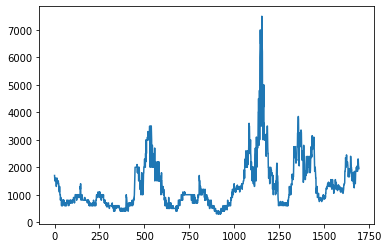

In [15]:
data['MODAL'].plot()

Trend Here is Linear so D(Order of Integration) = 1 

# Auto Corelation plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

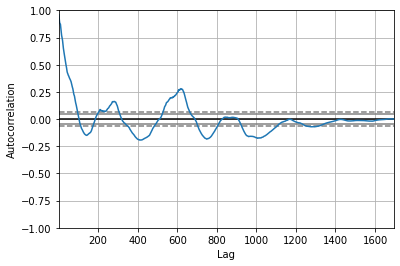

In [16]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['MODAL'])

line passing confidence interval at 100 so q=100

In [17]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data.MODAL.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.690519
p-value: 0.004249


AS P value is already less than 0.05 so our data is stationary and no diffrencing is required . i.e; D=0

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

C:\Users\athar\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


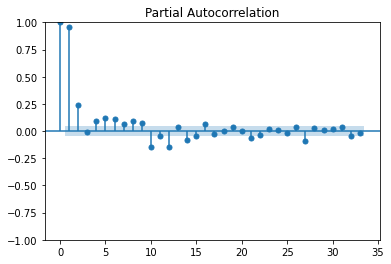

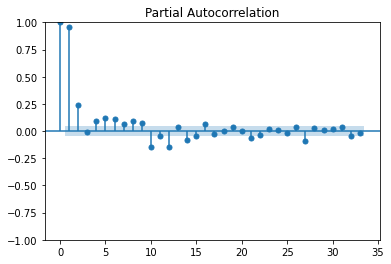

In [19]:
plot_pacf(data['MODAL'])

as the value of p = 2 gives the lag fuction the probability of 0.25 but the lag fuction at p = 1 gives the probability of 0.9
therefore we will take the value of p as 1.

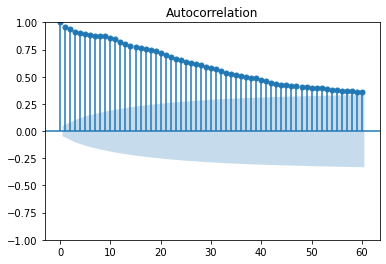

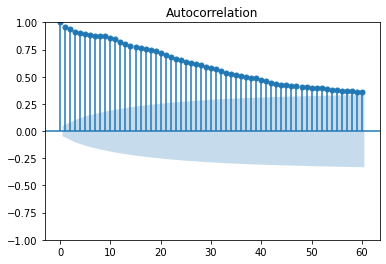

In [20]:
plot_acf(data.MODAL,lags=60)

Here we can see at q = 50 the value gets shut

C:\Users\athar\AppData\Local\Temp\ipykernel_11772\334691170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['forecast'] = model_fit.predict(start=1600,end=1700,dynamic=True)


<AxesSubplot:>

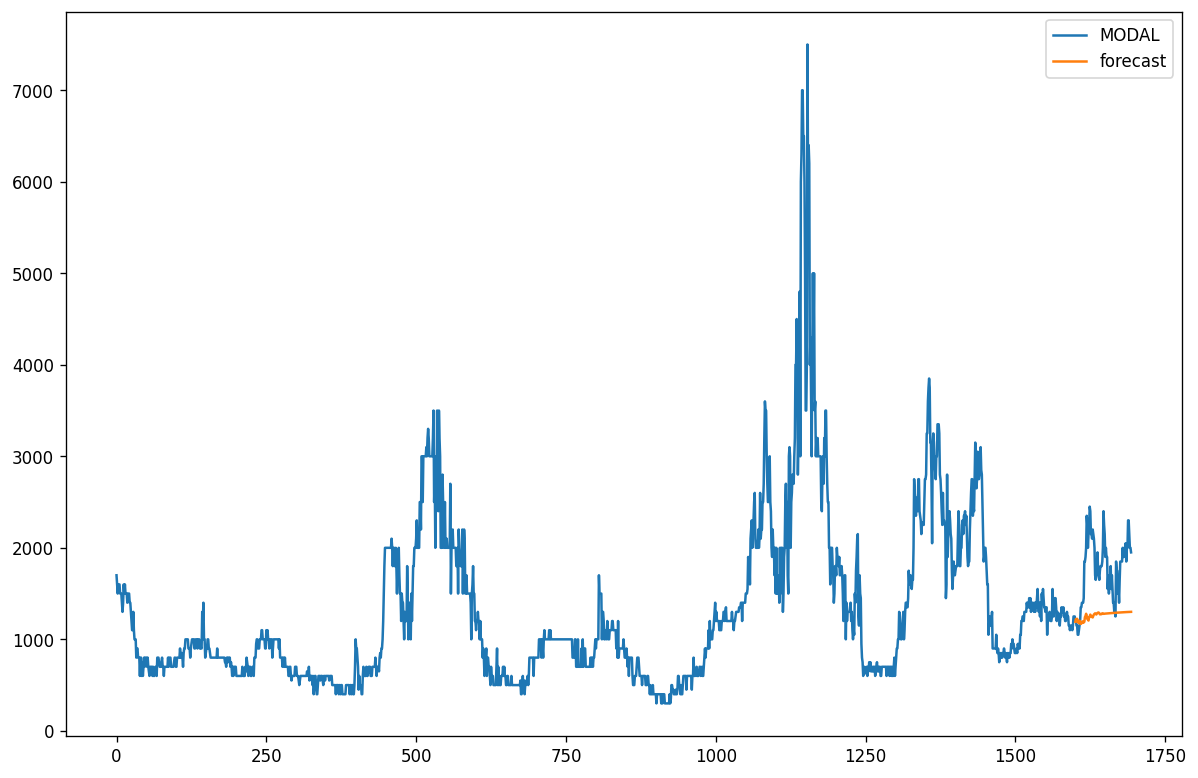

In [67]:
data['forecast'] = model_fit.predict(start=1600,end=1700,dynamic=True)
data[['MODAL','forecast']].plot(figsize=(12,8))

# SARIMAX

In [69]:
import statsmodels.api as sm

In [70]:
model = sm.tsa.statespace.SARIMAX(data['MODAL'],order=(1,0,50),seasonal_order=(1,0,50,280))
results = model.fit()

C:\Users\athar\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MemoryError: Unable to allocate 2.94 GiB for an array with shape (14051, 14051, 2) and data type float64

In [ ]:
data['forecast'] = results.predict(start=1600,end=1700,dynamic=True)
data[['MODAL','forecast']].plot(figsize=(12,8))